In [1]:
import pandas as pd
import re
from collections import Counter
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/sample_data/tripadvisor_hotel_reviews.csv'
reviews_df = pd.read_csv(file_path)

In [2]:
# Load the dataset
data = pd.read_csv('/content/sample_data/tripadvisor_hotel_reviews.csv')

# Inspect the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5
Review    0
Rating    0
dtype: int64


In [4]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define a function to preprocess the text
def preprocess_text(text):
    # Tokenize the text by splitting on non-alphanumeric characters
    tokens = re.findall(r'\b\w+\b', text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Custom stopwords list
stop_words = set([
    'hotel', 'stay', 'room', 'rooms', 'staff', 'great', 'good', 'nice', 'service', 'time'
])

# Apply preprocessing to all reviews
reviews_df['tokens'] = reviews_df['Review'].apply(preprocess_text)
print(reviews_df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                              Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                              tokens  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, 4, experience, hotel, monaco, se...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...  


**Word Frequency Analysis**

In [5]:
# Flatten the list of tokens for frequency analysis
all_tokens = [token for tokens in reviews_df['tokens'] for token in tokens]
freq_dist = Counter(all_tokens)

# Show the top 10 most common words
common_words = freq_dist.most_common(10)
common_words


[('hotel', 49814),
 ('room', 35331),
 ('great', 21475),
 ('n', 19097),
 ('good', 17412),
 ('staff', 16633),
 ('stay', 15411),
 ('nice', 12643),
 ('rooms', 12401),
 ('location', 11351)]

In [6]:
# Filter reviews with negative sentiment scores
negative_reviews = reviews_df[reviews_df['Rating'] < 3]

# Flatten the list of tokens from negative reviews for frequency analysis
negative_tokens = [token for tokens in negative_reviews['tokens'] for token in tokens]
negative_freq_dist = Counter(negative_tokens)

# Show the top 10 most common words in negative reviews
negative_common_words = negative_freq_dist.most_common(10)
negative_common_words

[('hotel', 7917),
 ('room', 7735),
 ('n', 4053),
 ('stay', 2622),
 ('rooms', 2324),
 ('staff', 2303),
 ('night', 2157),
 ('good', 2148),
 ('service', 2102),
 ('day', 1969)]

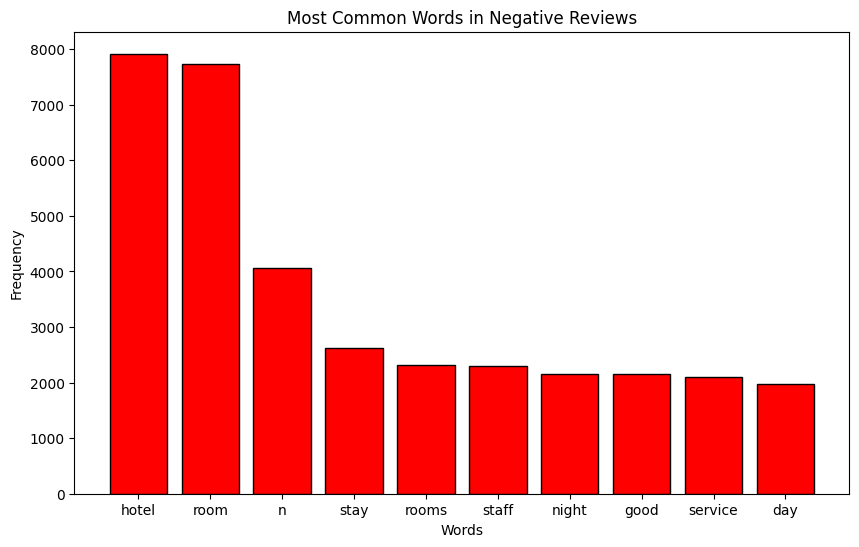

In [7]:
# Visualize the most common words in bad reviews
words, counts = zip(*negative_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='red', edgecolor='black')
plt.title('Most Common Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Perform sentiment analysis using TextBlob
reviews_df['sentiment'] = reviews_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [9]:
reviews_df.head()

,Review,Rating,tokens,sentiment
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...",0.208744
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",0.214923
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, 4, experience, hotel, monaco, se...",0.294420
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...",0.504825
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...",0.384615


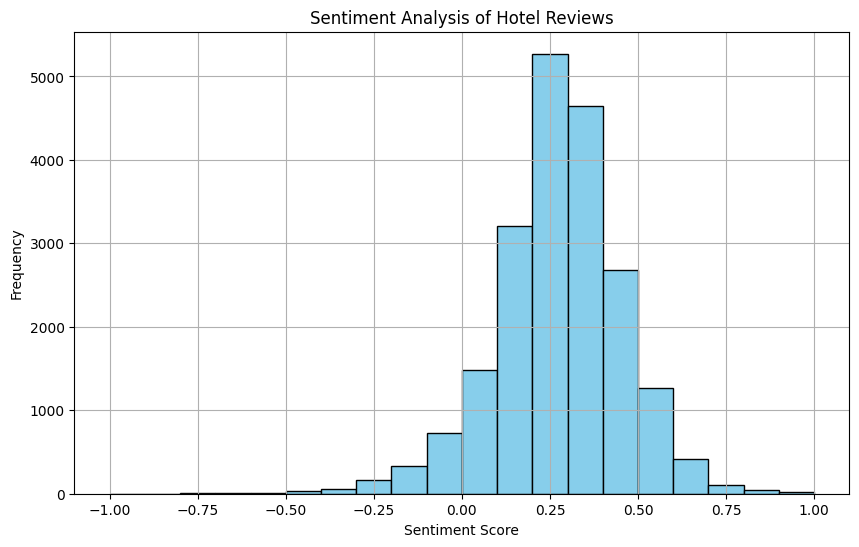

In [10]:
# Visualize the sentiment analysis
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Analysis of Hotel Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
reviews_df.head()

,Review,Rating,tokens,sentiment
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...",0.208744
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",0.214923
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, 4, experience, hotel, monaco, se...",0.294420
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...",0.504825
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...",0.384615


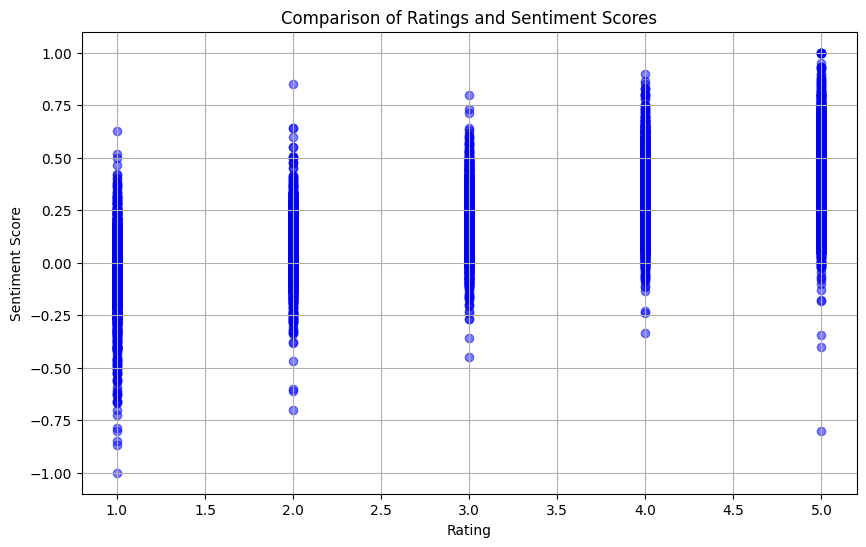

In [12]:
# Create a scatter plot to compare ratings with sentiment scores
plt.figure(figsize=(10, 6))
plt.scatter(reviews_df['Rating'], reviews_df['sentiment'], alpha=0.5, color='blue')
plt.title('Comparison of Ratings and Sentiment Scores')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

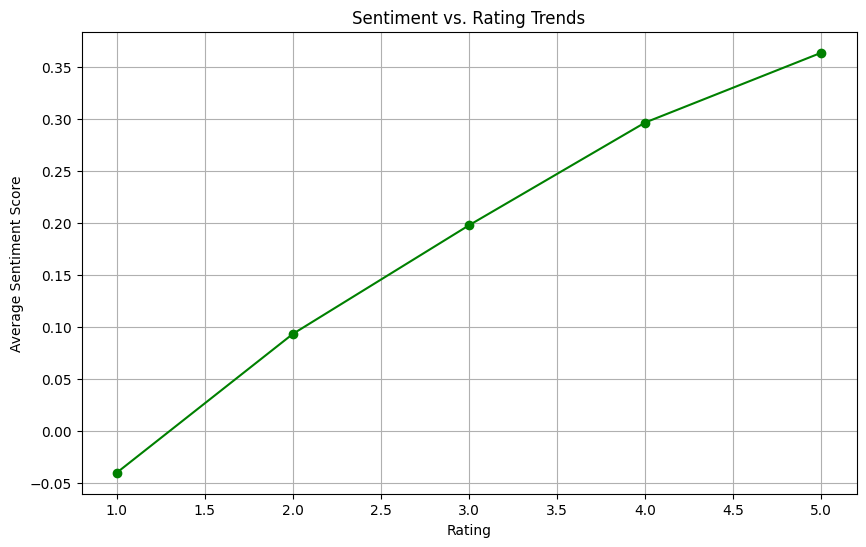

In [13]:
# Calculate the average sentiment score for each rating value
avg_sentiment_per_rating = reviews_df.groupby('Rating')['sentiment'].mean().reset_index()

# Plot the sentiment vs. rating trends
plt.figure(figsize=(10, 6))
plt.plot(avg_sentiment_per_rating['Rating'], avg_sentiment_per_rating['sentiment'], marker='o', linestyle='-', color='green')
plt.title('Sentiment vs. Rating Trends')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data['processed_review'] = data['Review'].apply(preprocess_text)
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                    processed_review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room 4 experience hotel monaco seattle go...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [15]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['processed_review']).toarray()
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.07893119 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02631916 0.         0.         ... 0.         0.         0.03667525]
 [0.         0.         0.         ... 0.24120856 0.         0.        ]]


In [16]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
print(X_pca.shape)


(20491, 50)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

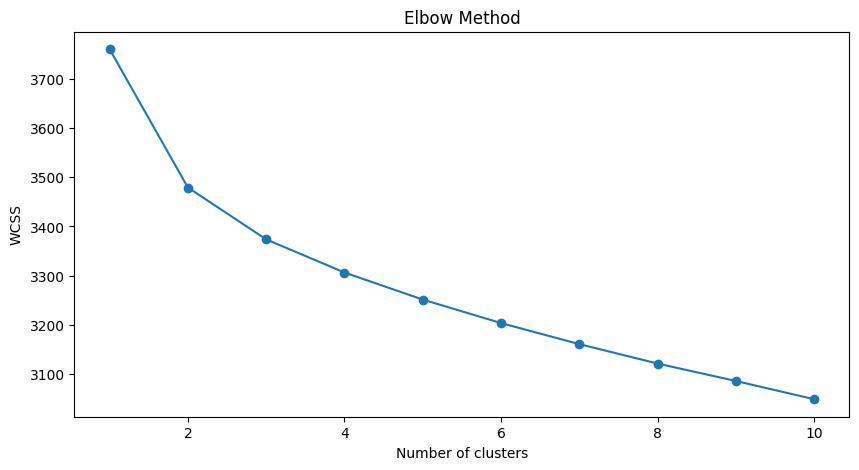

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot, choose the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_pca)


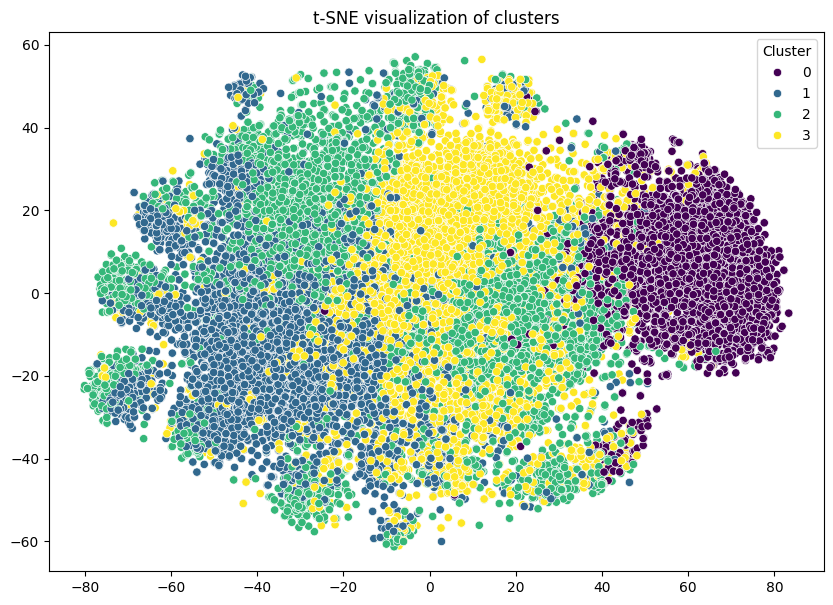

In [19]:
import seaborn as sns
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('t-SNE visualization of clusters')
plt.show()


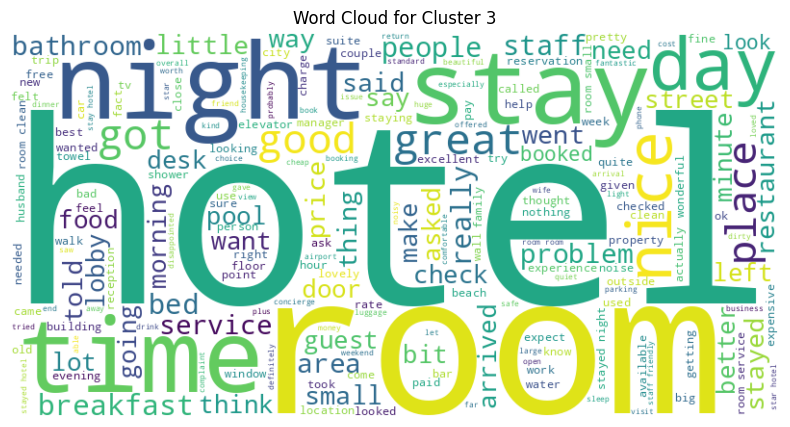

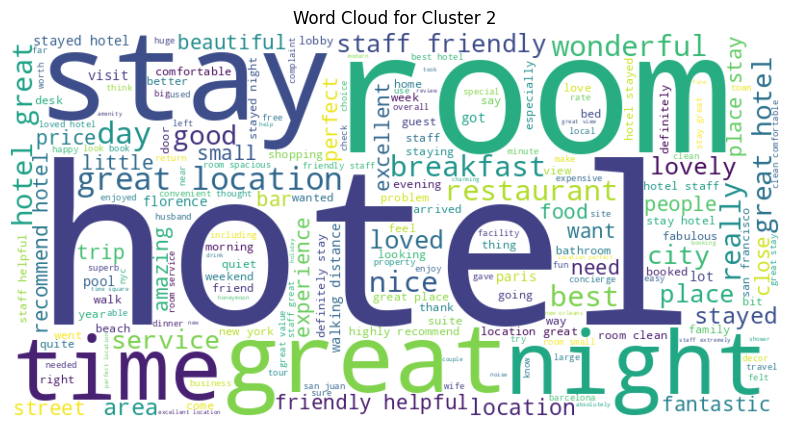

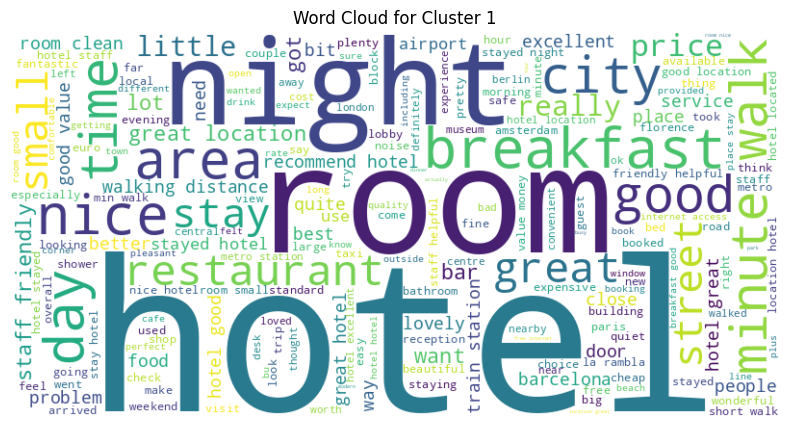

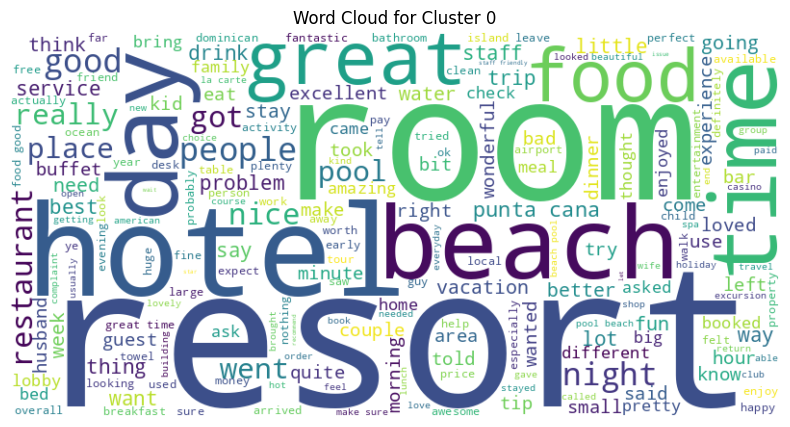

In [20]:
# Generate word clouds for each cluster
for cluster in data['Cluster'].unique():
    cluster_text = ' '.join(data[data['Cluster'] == cluster]['processed_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()
